# [SWCON253] Machine Learning
Teaching Assistant: Hyunmin Ban (hmban1996@khu.ac.kr)

Professor: Hui Yong Kim (hykim.v@khu.ac.kr)

---

# P1:  Pure Python만을 이용하여 Perceptron 구현 (10점)

### 학습목표
- Perceptron Python class를 직접 구현하면서 NN의 작동방법을 이해한다.
- 머신러닝 모델의 데이터 준비, 개발, 학습, 검증, 시각화 과정을 이해하고 설명 할 수 있다.

### 실습내용
Frank Rosenblatt의 classic perceptron binary classication(0 또는 1을 구분하는)을 구현합니다. <br>
여러분은 "Pure" 혹은 "vanilla" Python 함수만을 사용하여 구현해야합니다. 그러므로 시각화를 위한 matplotlib 이외의 패키지는 사용하지마세요.

실습은 다음 순서로 진행됩니다.
- 0) 실습에서 사용되는 패키지 import
- 1) 주어진 데이터셋 loading
- 2) Perceptron Model 구현 **<직접 구현>**
- 3) Perceptron Model 학습
- 4) Perceptron Model 검증
- 5) Decision Boundary 시각화
- 6) Discussion

**이번 실습에서 여러분은 `2) Perceptron Model 구현` 부분의 코드를 직접 작성합니다.**

앞으로 대부분의 실습도 위와 같은 순서로 진행됩니다. 이번 실습을 통해 각 부분의 코드를 이해하고 다음 실습에 참고하도록합니다.


### 점수
- Perceptron model 구현: 각 함수별로 2점


### 제출방법
- .ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.

## 0) Imports
**수정하지 마세요.** HW1에서는 "pure" python으로만 코드를 작성합니다. `matplotlib`이외의 패키지는 사용하지 않습니다.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1) Loading the Dataset
**수정하지 마세요.** 코드를 실행시켜 실습코드와 같이 첨부된 dataset.csv파일을 로드합니다.

In [11]:
cd /content/drive/MyDrive/ML/P1-Perceptron/

/content/drive/MyDrive/ML/P1-Perceptron


In [12]:
# CSV 파일을 읽기
X, y = [], []

with open('./dataset.csv', 'r') as f:
    next(f)
    for line in f:
        line = line.strip()
        if line:
            values = line.split(',')
        else:
            continue
        X.append([float(i) for i in values[:2]])
        y.append(int(values[-1]))
        
print(len(X), len(y))

100 100


### Dataset Split & Visualization
Load 된 데이터셋을 모델 학습과 검증을 위해 Trainset과 Testset으로 랜덤 샘플링하여 나누고 데이터셋이 어떤 분포로 생겼는지 시각화하여 살펴봅니다.

In [13]:
import random


# 랜덤시드 설정
random.seed(123)

# 데이터 랜덤 셔플
idx = list(range(len(X)))
random.shuffle(idx)

# 앞 80개 까지는 학습용으로 뒤 20개는 테스트용으로 split
X_train = [X[i] for i in idx[:80]]
y_train = [y[i] for i in idx[:80]]
X_test = [X[i] for i in idx[80:]]
y_test = [y[i] for i in idx[80:]]

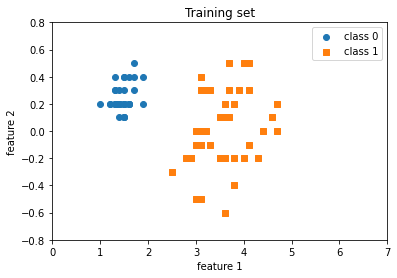

In [14]:
# 클래스 별로 데이터를 시각화 하여 분포를 살펴보기
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            label='class 0', marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')

plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

## 2) Perceptron model 구현
이 부분에서는 직접 `Perceptron model`을 구현해 봅니다.

Perceptron model은 생성자, forward, backward, train, evaluation 다섯개 함수로 이루어져 있습니다.
- `__init__` 생성자에서는 Perceptron의 weights와 bias를 초기화합니다.
- `forward`에서는 input을 Perceptron의 가중치를 이용해서 예측을 수행합니다.
- `backward`에서는 Perceptron의 가중치를 학습하기 위해 에러를 계산합니다.
- `train`에서는 Perceptron을 학습하는 과정으로 `forward`와 `backward`를 차례로 반복하여 Perceptron의 가중치를 업데이트 합니다.
- `evaluation`에서는 들어온 input data를 학습된 가중치를 이용하여 예측하고 결과를 반환합니다.

아래 `# <your code>` 부분을 채워 넣어서 Perceptron class를 직접 작성하여 구현하세요.

**세부 구현 사항:**
- weights는 랜덤으로 초기화, bias는 0으로 초기화한다.
- activation은 0.이상은 1., 이하는 0.으로 하도록한다.
- 설명되지 않은 사항은 자유롭게 작성하고 주석으로 설명한다.

#### Perceptron
![Perceptron](https://www.researchgate.net/profile/Daniel-Alvarez-34/publication/315788933/figure/fig3/AS:479799241121795@1491404461957/Scheme-of-a-perceptron-A-nonlinear-activation-function-BULLET-is-applied-to-the.png)
출처: https://www.researchgate.net/figure/Scheme-of-a-perceptron-A-nonlinear-activation-function-BULLET-is-applied-to-the_fig3_315788933

In [22]:
class Perceptron():
    def __init__(self, num_features):
        self.weights = [random.random() for i in range(num_features)]
        self.bias = 0

    def forward(self, x):
        # 가중치 합 구하기
        linear = 0.0
        for i in range(len(self.weights)):
          linear = linear + x[i] * self.weights[i]
        linear = linear + self.bias        
        # Activation에서 0 이상은 1, 이하는 0
        return 1 if linear >= 0 else 0
        
    def backward(self, x, y):
        # MSE를 이용하여 에러 계산
        errors = (x - y) ** 2
        return errors
        
    def train(self, x, y, epochs):
        # epochs 만큼 학습
        for e in range(epochs):
            # 데이터 하나씩 학습
            for i in range(len(y)):
                forward = self.forward(x[i])              # x = Train Set
                backward = self.backward(forward, y[i])   # y = Test Set
                # 에러 검출 시 가중치 업데이트
                if (backward == 1):
                  for j in range(len(self.weights)):
                    # Δloss/Δwi = Δloss/Δpredict * Δpredict/Δwi = 2 * (forward-y) * xi
                    self.weights[j] = self.weights[j] - 2 * (forward-y[i])*float(x[i][j]) * 0.01
                  # Δloss/Δbias = Δloss/Δpredict * Δpredict/Δbias = 2 * (forward-y) * 1
                  self.bias = self.bias - 2 * (forward-y[i]) * 0.01
                
    def evaluate(self, x, y):
        accuracy = 0
        error = 0
        for i in range(len(x)):
          error = error + (self.forward(x[i]) - y[i]) ** 2
        accuracy = 1 - error
        return accuracy

## 3) Perceptron 학습

작성한 Perceptron을 Trainset을 이용해 5 epoch 학습하고 학습된 weight, bias를 print합니다.

In [23]:
ppn = Perceptron(num_features=2)  # 위에서 구현한 Perceptron 모델 정의
ppn.train(X_train, y_train, 5)    # 5 epoch 학습

# 학습된 모델의 weight, bias 출력
print(ppn.weights)
print(ppn.bias)

[0.13981148264314666, 0.04758973057390496]
-0.3


## 4) 모델 평가
Training set과 Test set각각에서 모델의 accuracy를 계산합니다.

In [24]:
# Train dataset에서 성능 평가
train_acc = ppn.evaluate(X_train, y_train)
print('Train set accuracy: %.2f%%' % (train_acc*100))

Train set accuracy: 100.00%


In [25]:
# Test dataset에서 성능 평가
test_acc = ppn.evaluate(X_test, y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 100.00%


## 5) Decision Boundary
train 데이터셋과 test 데이터셋 각각을 이용하여 2개의 scatter plot을 그리고 그 위에 학습된 가중치를 이용하여 결정경계를 시각화합니다.

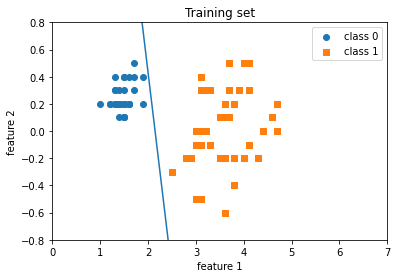

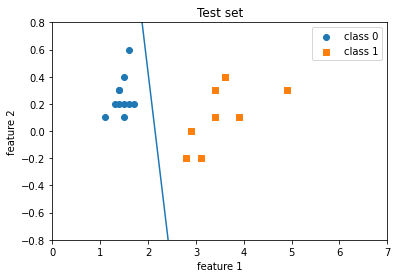

In [26]:
### Train 데이터셋에서 Decision Boundary 시각화
# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            label='class 0', marker='o')
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')
# Perscptron의 Weight와 Bias를 그래프로 표현
plt.plot([0, 7], [-ppn.bias/ppn.weights[1], -(7*ppn.weights[0] + ppn.bias)/ppn.weights[1]])

# 그래프로 표현
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

### Test 데이터셋에서 Decision Boundary 시각화
# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 0], 
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 0],
            label='class 0', marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 1], 
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            label='class 1', marker='s')
# Perscptron의 Weight와 Bias를 그래프로 표현
plt.plot([0, 7], [-ppn.bias/ppn.weights[1], -(7*ppn.weights[0] + ppn.bias)/ppn.weights[1]])

# 그래프로 표현
plt.title('Test set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

## 6) Discussion

**1) 예시에서 사용된 activation 함수 이외의 어떤 함수가 있는지 찾아보고 설명해보세요.**

Sigmoid: 꼬임 없이 S자로 보이는 매끄러운 비선형 함수입니다. 출력의 확률을 예측할 수 있으며, 확률이 0에서 1까지이므로 값은 0과 1사이에서 분포합니다. 실습에서 사용한 Threshold Function과는 달리 미분이 가능하다는 특징이 있습니다.

Softmax: 각 Class의 총합이 1이 되어야 하며, 이는 확률 100%를 뜻합니다. 다른 Class에서의 확률이 증가하면 또 다른 Class의 확률도 감소하므로, 가장 높은 확률의 Class는 최종 결과 Class입니다.

Hyperbolic Tanh: Sigmoid와 유사하지만, Gradient Descent 과정에서 + 기울기와 - 기울기로 나뉘는데, Sigmoid에 비해 상대적으로 기울기 값이 강하다는 특징이 있습니다.

**2) 단층 Perceptron 으로 풀 수 없는 문제는 어떤것이 있는지 왜 그런지 설명해보세요.**

대표적인 예시로 XOR 문제가 있습니다. XOR 문제(0: {0, 0}, {1, 1}, 1: {0, 1}, {1, 0})에서 0의 출력을 가지는 경우와, 1의 출력을 가지는 경우를 분류하기 위해서는 곡선을 그리거나, 2개의 직선을 그려야 합니다. 그러므로 단층 퍼셉트론으로 해결하지 못합니다.

**3) 구현하면서 든 질문에 대해 적고 답할 수 있다면 스스로 답해보세요.**

weight와 bias가 어떤 관계가 있는지 궁금하여 자료를 찾아봤습니다. 다층 perceptron의 경우에서, weight는 어떤 feature에 가중치를 많이 주어야 output을 올바르게 산출하는지에 대한 역할을 하고, bias는 추가 파라미터로서 입력에 weight가 적용된 합계인 Σxiwi와 함께 출력을 조정하는데 사용됩니다. 즉 weight 값을 증가시키면 학습의 기울기가 증가하고, activation function에서 가장 최적의 경우를 찾기 위해 bias 값을 조정합니다. 최종적으로 출력 결과에 대한 식은 다음과 같이 정의할 수 있습니다. output = sum (weights * inputs) + bias

---